# Yahoo! News Scraper

In [7]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

#### Setup the url template and request headers

In [108]:
template = 'https://news.search.yahoo.com/search;_ylt=AwrXgyLBXFRgKjcAEE7QtDMD;_ylc=X1MDNTM3MjAyNzIEX3IDMgRmcgNzZnAEZnIyA3NhLWdwLXNlYXJjaARncHJpZANKal9XTGo4VVRHSzA4aDhFeTNsc2NBBG5fcnNsdAMwBG5fc3VnZwMxMARvcmlnaW4DbmV3cy5zZWFyY2gueWFob28uY29tBHBvcwMxBHBxc3RyA2FpcndhBHBxc3RybAM1BHFzdHJsAzEwBHF1ZXJ5A3VzJTIwYWlyd2F5cwR0X3N0bXADMTYxNjE0MTYzMAR1c2VfY2FzZQM-?p=us+airways&fr2=sa-gp-search&fr=sfp'

In [101]:
template

'https://finance.yahoo.com/https://news.search.yahoo.com/search;{}'

In [102]:
url = template.format('us airways')

In [104]:
url

'https://finance.yahoo.com/https://news.search.yahoo.com/search;us airways'

In [109]:
headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://in.yahoo.com/',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

#### Get the collection of articles

In [110]:
response = requests.get(template, headers=headers)

In [111]:
response

<Response [200]>

In [112]:
soup = BeautifulSoup(response.text, 'html.parser')

<!DOCTYPE doctype html>
<html class="NoJs" id="atomic" lang="en-US"><head><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="text/html; charset=utf-8" http-equiv="content-type"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_76.min.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_114.min.png" rel="apple-touch-icon" sizes="114x114"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_120.min.png" rel="apple-touch-icon" sizes="120x120"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><noscript><meta content="0;url=https://news.search.yahoo.com/search?p=us+airways&amp;ei=UTF-8&amp;nojs=1" http-equiv="refresh"/></noscript><script nonce="DvSRMWfWqIbt/dNTURgtRw==" type="text/javascript">(function(){var j=window,s=document,u,o;var c=false;var r=false;var p=2,m="\x03",l="\x04",n="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789
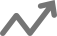
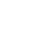
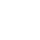
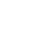
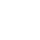

In [114]:
print(soup)

In [115]:
cards = soup.find_all('div', 'dd NewsArticle')

In [116]:
len(cards)

10

In [117]:
print(cards)

[<div class="dd NewsArticle" data-a22="60545f51cab05"><ul class="compArticleList"><li class="ov-a fst"><a class="thmb " href="https://r.search.yahoo.com/_ylt=AwrC1jFRX1RgUDEAPxLQtDMD;_ylu=Y29sbwNiZjEEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1616170961/RO=10/RU=https%3a%2f%2fwww.usatoday.com%2fstory%2ftravel%2fcolumnist%2fcox%2f2021%2f03%2f18%2fcan-turbulence-alone-cause-airliner-crash-pilot-explains%2f4736110001%2f/RK=2/RS=LSu9Zn8ci4hMRMtyQ7zGkohZf2A-" referrerpolicy="origin" target="_blank" title="Can turbulence alone cause a plane to crash? Here's what an airline pilot had to say"><img alt="Can turbulence alone cause a plane to crash? Here's what an airline pilot had to say" class="s-img hidden" data-src="https://s.yimg.com/fz/api/res/1.2/RT8Yw7LjFarFDhsgxgQWEA--~C/YXBwaWQ9c3JjaGRkO2ZpPWZpbGw7aD05MjtweG9mZj0wO3B5b2ZmPTA7cT04MDt3PTE2NA--/https://s.yimg.com/am/60d/f1310606e8393fdab9be34846c2989fb" height="92" title="Can turbulence alone cause a plane to crash? Here's what an airline pilot had 

#### Create a prototype model for extracting article data

In [119]:
for i in cards:
  print(i)

<div class="dd NewsArticle" data-a22="60545f51cab05"><ul class="compArticleList"><li class="ov-a fst"><a class="thmb " href="https://r.search.yahoo.com/_ylt=AwrC1jFRX1RgUDEAPxLQtDMD;_ylu=Y29sbwNiZjEEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1616170961/RO=10/RU=https%3a%2f%2fwww.usatoday.com%2fstory%2ftravel%2fcolumnist%2fcox%2f2021%2f03%2f18%2fcan-turbulence-alone-cause-airliner-crash-pilot-explains%2f4736110001%2f/RK=2/RS=LSu9Zn8ci4hMRMtyQ7zGkohZf2A-" referrerpolicy="origin" target="_blank" title="Can turbulence alone cause a plane to crash? Here's what an airline pilot had to say"><img alt="Can turbulence alone cause a plane to crash? Here's what an airline pilot had to say" class="s-img hidden" data-src="https://s.yimg.com/fz/api/res/1.2/RT8Yw7LjFarFDhsgxgQWEA--~C/YXBwaWQ9c3JjaGRkO2ZpPWZpbGw7aD05MjtweG9mZj0wO3B5b2ZmPTA7cT04MDt3PTE2NA--/https://s.yimg.com/am/60d/f1310606e8393fdab9be34846c2989fb" height="92" title="Can turbulence alone cause a plane to crash? Here's what an airline pilot had t

In [121]:
card = cards[0]

In [123]:
headline = card.find('h4', 's-title').text

In [124]:
headline

"Can turbulence alone cause a plane to crash? Here's what an airline pilot had to say"

In [125]:
source = card.find("span", 's-source').text

In [126]:
source

'USA Today'

In [127]:
posted = card.find('span', 's-time').text.replace('·', '').strip()

In [128]:
posted

'7 hours ago'

In [129]:
description = card.find('p', 's-desc').text.strip()

The url needs a little more cleaning... the original URL is hiding inside the Yahoo! News link

In [130]:
description

'Can turbulence cause an aircraft to crash? In the early days of commercial jets, there were a few...'

In [131]:
raw_link = card.find('a').get('href')
raw_link

'https://r.search.yahoo.com/_ylt=AwrC1jFRX1RgUDEAPxLQtDMD;_ylu=Y29sbwNiZjEEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1616170961/RO=10/RU=https%3a%2f%2fwww.usatoday.com%2fstory%2ftravel%2fcolumnist%2fcox%2f2021%2f03%2f18%2fcan-turbulence-alone-cause-airliner-crash-pilot-explains%2f4736110001%2f/RK=2/RS=LSu9Zn8ci4hMRMtyQ7zGkohZf2A-'

In [132]:
unquoted_link = requests.utils.unquote(raw_link)
unquoted_link

'https://r.search.yahoo.com/_ylt=AwrC1jFRX1RgUDEAPxLQtDMD;_ylu=Y29sbwNiZjEEcG9zAzEEdnRpZAMEc2VjA3Ny/RV=2/RE=1616170961/RO=10/RU=https://www.usatoday.com/story/travel/columnist/cox/2021/03/18/can-turbulence-alone-cause-airliner-crash-pilot-explains/4736110001//RK=2/RS=LSu9Zn8ci4hMRMtyQ7zGkohZf2A-'

In [133]:
pattern = re.compile(r'RU=(.+)\/RK')
clean_link = re.search(pattern, unquoted_link).group(1)
clean_link

'https://www.usatoday.com/story/travel/columnist/cox/2021/03/18/can-turbulence-alone-cause-airliner-crash-pilot-explains/4736110001/'

#### Generalize the model

In [134]:
def get_article(card):
    """Extract article information from the raw html"""
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    clean_link = re.search(pattern, unquoted_link).group(1)
    
    article = (headline, source, posted, description, clean_link)
    return article

In [135]:
articles = []
links = set()

for card in cards:
    article = get_article(card)
    link = article[-1]
    if not link in links:
        links.add(link)
        articles.append(article)

In [136]:
articles[:5]

[("Can turbulence alone cause a plane to crash? Here's what an airline pilot had to say",
  'USA Today',
  '7 hours ago',
  'Can turbulence cause an aircraft to crash? In the early days of commercial jets, there were a few...',
  'https://www.usatoday.com/story/travel/columnist/cox/2021/03/18/can-turbulence-alone-cause-airliner-crash-pilot-explains/4736110001/'),
 ('NBA Rumors: Lakers Told What They Should Trade In Exchange For In-Demand Veteran',
  'International Business Times',
  '3 days ago',
  'Veteran forward PJ Tucker could be close to finally leaving the Houston Rockets. Things have gone a...',
  'https://www.ibtimes.com/nba-rumors-lakers-told-what-they-should-trade-exchange-demand-veteran-3162746'),
 ("'Orlando' word war: Melbourne airport may rearrange its name to settle lawsuit with rival",
  'USA TODAY via Yahoo News',
  '1 day ago',
  'Melbourne and Orlando airport officials appear on the verge of settling their five-year dispute and...',
  'https://news.yahoo.com/orlando-

#### Get the next page

In [137]:
url = soup.find('a', 'next').get('href')
url

'https://news.search.yahoo.com/search;_ylt=AwrC1jFRX1RgUDEAchLQtDMD;_ylu=Y29sbwNiZjEEcG9zAzEEdnRpZAMEc2VjA3BhZ2luYXRpb24-?p=us+airways&fr=sfp&fr2=sa-gp-search&b=11&pz=10&bct=0&xargs=0'

#### Bringing it all together

In [138]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

def get_article(card):
    """Extract article information from the raw html"""
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    clean_link = re.search(pattern, unquoted_link).group(1)
    
    article = (headline, source, posted, description, clean_link)
    return article

def get_the_news(search):
    """Run the main program"""
    template = 'https://news.search.yahoo.com/search?p={}'
    url = template.format(search)
    articles = []
    links = set()
    
    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'NewsArticle')
        
        # extract articles from page
        for card in cards:
            article = get_article(card)
            link = article[-1]
            if not link in links:
                links.add(link)
                articles.append(article)        
                
        # find the next page
        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break
            
    # save article data
    with open('results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Headline', 'Source', 'Posted', 'Description', 'Link'])
        writer.writerows(articles)
        
    return articles

In [139]:
articles = get_the_news('usa airlines')

In [140]:
articles[:5]

[('Airlines Almost Profitable Again as Bookings Soar',
  'AOL',
  '3 days ago',
  'Aviation leaders are expressing excitement that with COVID-19 vaccinations speeding up, the industry may recover sooner rather than later. Executives...',
  'https://www.aol.com/finance/airlines-almost-profitable-again-bookings-103152954.html'),
 ("John Kerry on maskless photo: 'If I dropped my mask to one ear on a flight, it was momentary'",
  'USA TODAY via Yahoo News',
  '18 hours ago',
  'The former secretary of state, senator and 2004 presidential candidate was photographed while...',
  'https://news.yahoo.com/john-kerry-maskless-photo-dropped-123549953.html'),
 ("'Historic and crippling' winter storm dumps over 25 inches of snow in Cheyenne, Wyoming; travel...",
  'USA TODAY via Yahoo News',
  '4 days ago',
  'Winter and spring collided Sunday as parts of Colorado, Wyoming, Utah and Nebraska were blasted with...',
  'https://news.yahoo.com/winter-storm-pounds-denver-could-132920630.html'),
 ('Alleg

In [ ]:
import pandas as pd

In [141]:
data = pd.read_csv('/content/results.csv')
data

Headline  ...                                               Link
0   Airlines Almost Profitable Again as Bookings Soar  ...  https://www.aol.com/finance/airlines-almost-pr...
1   John Kerry on maskless photo: 'If I dropped my...  ...  https://news.yahoo.com/john-kerry-maskless-pho...
2   'Historic and crippling' winter storm dumps ov...  ...  https://news.yahoo.com/winter-storm-pounds-den...
3   Allegedly drunk Alaska Airlines passenger face...  ...  https://www.foxnews.com/travel/drunk-alaska-ai...
4   'Home Nesting' and Telehealth Spending to Keep...  ...  https://money.usnews.com/investing/news/articl...
..                                                ...  ...                                                ...
95  Sun Country eyes quicker used jet purchases wi...  ...  https://kfgo.com/2021/03/17/sun-country-eyes-q...
96  Sabre advances NDC capabilities with expanded ...  ...  http://www.portlavacawave.com/news/state/sabre...
97  Taiwan to open first travel bubble, with tiny ...  ...  https://wsau.com/2021/03/17/taiwan-to-open-fir...
98  Taiwan to open first travel bubble, with tiny ...  ...  https://whtc.com/2021/03/17/taiwan-to-open-fir...
99  Taiwan to open first travel bubble, with tiny ...  ...  https://kfgo.com/2021/03/17/taiwan-to-open-fir...

[100 rows x 5 columns]

In [24]:
import requests

from bs4 import BeautifulSoup



URL = 'https://finance.yahoo.com/most-active?count=150'

headers = {

    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'}

page = requests.get(URL, headers=headers)

soup = BeautifulSoup(page.text, 'html.parser')

stock_elems = soup.select(".simpTblRow")

for stock_elem in stock_elems:

    symbol = stock_elem.select("td:nth-of-type(1)")[0].text

    name = stock_elem.select("td:nth-of-type(2)")[0].text

    last_price = stock_elem.select("td:nth-of-type(3)")[0].text

    change = stock_elem.select("td:nth-of-type(4)")[0].text

    change_in_percentage = stock_elem.select("td:nth-of-type(5)")[0].text

In [40]:
symbol
name
last_price
change
change_in_percentage

'-5.28%'

In [58]:
dic1 = {'symbol':0,'name':1,'last_price':2,'change':3,'change_in_precentage':4}

In [59]:
print(dic1)

{'symbol': 0, 'name': 1, 'last_price': 2, 'change': 3, 'change_in_precentage': 4}


In [60]:
dic1['symbol'] = symbol
dic1['name'] = name
dic1['last_price'] = last_price
dic1['change'] = change
dic1['change_in_precentage'] = change_in_percentage

In [72]:
dic1['symbol']

'SPCE'

In [77]:
final


[{'change': '-1.78',
  'change_in_precentage': '-5.28%',
  'last_price': '31.96',
  'name': 'Virgin Galactic Holdings, Inc.',
  'symbol': 'SPCE'}]

In [73]:
with open('results4.csv', 'w', newline='', encoding='utf-8') as f:
      writer = csv.writer(f)
      writer.writerow(['symbol','name','last_price','change','change_in_percentage'])
      writer.writerows(final)
        



In [83]:
from xlsxwriter import Workbook
ordered_list=['change','change_in_precentage','last_price','name','symbol'] #list object calls by index but dict object calls items randomly
wb=Workbook("Final_Output.xlsx")
ws=wb.add_worksheet("New Sheet") #or leave it blank, default name is "Sheet 1"
first_row=0
for header in ordered_list:
    col=ordered_list.index(header) # we are keeping order.
    ws.write(first_row,col,header) # we have written first row which is the header of worksheet also.
row=1
for j in final: 
    #print(j)
    for _key,_value in j.items():
        col=ordered_list.index(_key)
        ws.write_row(row,col,_value)
    row+=1 #enter the next row
wb.close()

In [79]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 4.9MB/s 


In [74]:
data = pd.read_csv('results4.csv')

In [84]:
pd.read_excel("Final_Output.xlsx")
# Preview of Excel file

change change_in_precentage  last_price  ... Unnamed: 30  Unnamed: 31  Unnamed: 32
0      -                    -           5  ...           n            c            .

[1 rows x 33 columns]